In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [0]:
DATA_URL = 'http://128.138.93.164/aprd6342/data/TravelPonyFacebook.csv'
df = pd.read_csv(DATA_URL)
dfCleaned = df[df['Amount Spent (USD)'] != 0]
dfCleaned.head(10)

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.000000,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.000000,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.000000,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.000000,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.590000,2.512857
5,2013-11-22,2013-11-22,Bob Jackson,TravelPony: Conversion Test,7096,1.018743,7229,32,32,45.01,2,5,3,0,0,0,0,3,22.505000,9.002000
6,2013-11-21,2013-11-21,Bob Jackson,TravelPony: Conversion Test,29437,1.000000,29437,100,80,200.00,10,43,33,0,0,0,0,33,20.000000,4.651163
7,2013-11-21,2013-11-21,Bob Jackson,TravelPony: General Ads,30320,1.018239,30873,178,157,98.09,5,50,45,0,0,0,0,45,19.618000,1.961800
8,2013-11-20,2013-11-20,Bob Jackson,TravelPony: Conversion Test,25951,1.026820,26647,133,113,200.00,8,50,42,0,0,0,0,42,25.000000,4.000000
9,2013-11-20,2013-11-20,Bob Jackson,TravelPony: General Ads,49038,1.000000,49038,324,276,178.77,13,112,99,0,0,0,0,99,13.751538,1.596161


## Question 1: Graph a histogram of Amount Spent using Seaborn and Create      scatter plots for spend and: reach, frequency, impressions and clicks.

Text(0.5, 1.0, 'Histogram of Amount Spent')

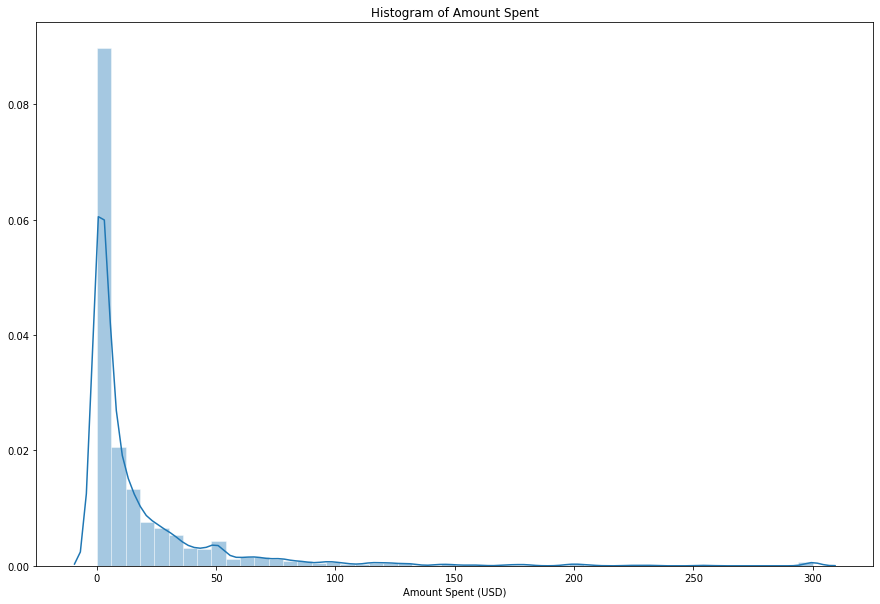

In [0]:
# graph a histogram of Amount Spent using Seaborn
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.set_style('darkgrid')
sns.distplot(dfCleaned['Amount Spent (USD)']).set_title('Histogram of Amount Spent')

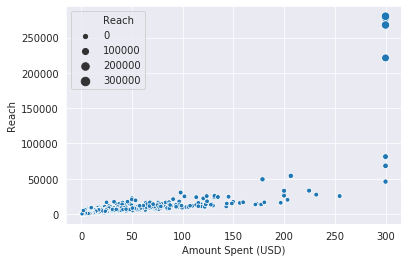

In [0]:
# Spend and Reach
sns.scatterplot(x='Amount Spent (USD)', y='Reach',size='Reach',data=dfCleaned)

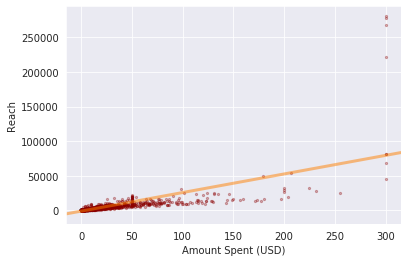

In [0]:
sns.regplot(x='Amount Spent (USD)', y='Reach',ci=None,scatter_kws={"color":"darkred","alpha":0.3,"s":5},line_kws={"color":"#ff8000","alpha":0.5,"lw":3},data=dfCleaned)

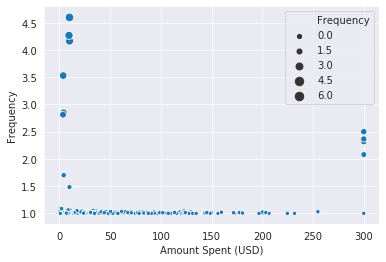

In [0]:
#Spend and Frequency
sns.scatterplot(x='Amount Spent (USD)', y='Frequency',size='Frequency',data=dfCleaned)

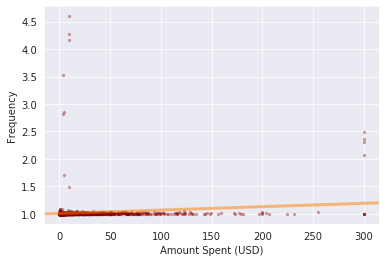

In [0]:
sns.regplot(x='Amount Spent (USD)', y='Frequency',ci=None,scatter_kws={"color":"darkred","alpha":0.3,"s":5},line_kws={"color":"#ff8000","alpha":0.5,"lw":3},data=dfCleaned)

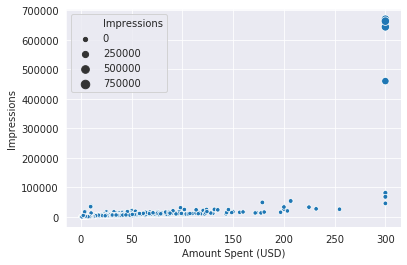

In [0]:
#Spent and Impressions
sns.scatterplot(x='Amount Spent (USD)', y='Impressions',size='Impressions',data=dfCleaned)

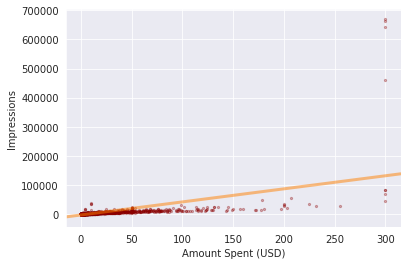

In [0]:
sns.regplot(x='Amount Spent (USD)', y='Impressions',ci=None,scatter_kws={"color":"darkred","alpha":0.3,"s":5},line_kws={"color":"#ff8000","alpha":0.5,"lw":3},data=dfCleaned)

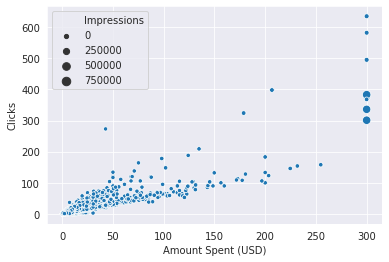

In [0]:
# Spent and Clicks
sns.scatterplot(x='Amount Spent (USD)', y='Clicks',size='Impressions',data=dfCleaned)

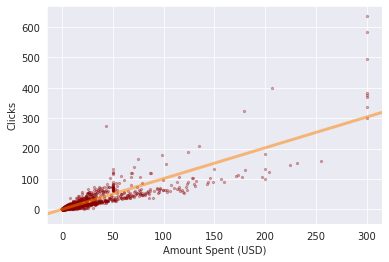

In [0]:
sns.regplot(x='Amount Spent (USD)', y='Clicks',ci=None,scatter_kws={"color":"darkred","alpha":0.3,"s":5},line_kws={"color":"#ff8000","alpha":0.5,"lw":3},data=dfCleaned)

According to scatter plot, althrough there are some outliers, but Amount spent still has the obvious overall liner relationship with reach, frequency, cilcks and impressions, The liner relationship of impressions not as obvious as others,but still has liner relationship.
So in conclusion, because Amount Spent has liner relationships with others attributes, so we might can say linear regression will work for this problem.

## Question 2: Build a multiple regression

In [0]:
#  ignore the warning message
pd.options.mode.chained_assignment = None  
# Set Campain Name to string, remove "_" and Numbers
dfCleaned['Campaign Name'] = dfCleaned['Campaign Name'].astype('str') 
dfCleaned['Campaign Name'] = dfCleaned['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]', '') 
dfCleaned['Campaign Name'] = dfCleaned['Campaign Name'].str.replace('\d+', '') 
# Group by the Campain Name 
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('Nanigans', case=False), 'Campaign Name'] = 'Nanigans'
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('TravelPony', case=False), 'Campaign Name'] = 'TravelPony'
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('Simple'), 'Campaign Name'] = 'Simple_Multi_Fill_Campaign'
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('Ad'), 'Campaign Name'] = 'Ad'
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('Post'), 'Campaign Name'] = 'Post'
# Check the Campaign Name
dfCleaned['Campaign Name'].unique()

#dfCleaned['Campaign Name'] = dfCleaned['Campaign Name'].astype('category')
#dfCleaned['Campaign Code'] = dfCleaned['Campaign Name'].cat.codes



array(['Cyber Weekend', 'TravelPony', 'Post', 'Nanigans',
       'Simple_Multi_Fill_Campaign', 'Ad'], dtype=object)

In [0]:
dfCleaned2 = pd.get_dummies(dfCleaned['Campaign Name'])
dfD = pd.concat([dfCleaned, dfCleaned2], axis=1)
#  selecting independent variables and dependent variable for regression
depend = dfD['Amount Spent (USD)']
independ = dfD[['Ad','Cyber Weekend','Nanigans','Post','Simple_Multi_Fill_Campaign','TravelPony','Reach','Frequency',
                 'Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes',
                 'Post Comments','Post Shares','Photo Views','Website Clicks']]

#  build a multiple regression 
model = sm.OLS(depend, independ).fit()
predictions = model.predict(independ) # make the predictions by the model
#  show the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1360.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:49:15   Log-Likelihood:                -6573.0
No. Observations:                1802   AIC:                         1.318e+04
Df Residuals:                    1784   BIC:                         1.328e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Ad                             0.1666      3.803      0.044      0.965      -7.292       7.625
Cyber Weekend               -193.3195     26.951     -7.173      0.000    -246.179    -140.460
Nanigans                      -2.3150      2.014     -1.149      0.251      -6.266       1.636
Post                         -12.0410      7.576     -1.589      0.112     -26.899       2.817
Simple_Multi_Fill_Campaign    -0.0647      1.882     -0.034      0.973      -3.756       3.627
TravelPony                     7.2926      4.253      1.715      0.087      -1.048      15.633
Reach                          0.0033      0.000     20.921      0.000       0.003       0.004
Frequency                     -0.7778      1.836     -0.424      0.672      -4.378       2.823
Impressions                   -0.0009   8.41e-05    -10.146      0.000      -0.001      -0.001
Clicks                        -0.3859      0.113     -3.413      0.001      -0.608      -0.164
Unique Clicks                  0.5155      0.127      4.057      0.000       0.266       0.765
Page Likes                    24.4507      9.359      2.613      0.009       6.096      42.806
Page Engagement              -21.1451      9.355     -2.260      0.024     -39.494      -2.796
Post Engagement               18.0241      7.797      2.312      0.021       2.732      33.316
Post Likes                     2.6100      1.564      1.669      0.095      -0.458       5.678
Post Comments                  3.5949      1.627      2.209      0.027       0.403       6.787
Post Shares                    4.9334      1.588      3.107      0.002       1.819       8.048
Photo Views                    3.3214      1.562      2.126      0.034       0.257       6.385
Website Clicks                 3.5644      1.563      2.281      0.023       0.500       6.629
==============================================================================
Omnibus:                      796.064   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21680.838
Skew:                           1.484   Prob(JB):                         0.00
Kurtosis:                      19.732   Cond. No.                     3.51e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Question 3 :What are the three predictors with the highest predictive value

In [0]:
p = 0.05
result = pd.concat([model.pvalues, model.params], axis=1)
result = result.rename(index=str, columns={0: "P Value", 1: "Coeff."})
# remove p value larger than 0.05, which is not significant to discuss in our case
# sort value based on the coeff.
result = result[result['P Value'] < p].sort_values('Coeff.', ascending = False)
result['Rank'] = result['Coeff.'].rank(ascending=0).astype(int)
result

,P Value,Coeff.,Rank
Page Likes,9.059883e-03,24.450740,1
Post Engagement,2.090729e-02,18.024142,2
Post Shares,1.920459e-03,4.933423,3
Post Comments,2.731019e-02,3.594876,4
Website Clicks,2.265358e-02,3.564398,5
Photo Views,3.363899e-02,3.321407,6
Unique Clicks,5.180673e-05,0.515465,7
Reach,4.302627e-87,0.003310,8
Impressions,1.482248e-23,-0.000853,9
Clicks,6.578548e-04,-0.385926,10


After ranking, we can find th three predictors with the highest predictive value are 
1.Page Likes (P-Value:9.059883e-03, Coeff:24.450740), 
2.Post Engagement (P-Value:2.090729e-02, Coeff:18.024142),
3.Post Shares (P-Value:1.920459e-03, Coeff:4.933423)